<h1 style='color:red' align='center'>Predict whether or not a patient should be tested for Diabetes </h1>

<img src='banner_diabetes.png' width='500' height='500' />

<h2 style='color:black'  align='center'> Importing Packages and Dataset </h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.svm import SVC 

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import roc_curve ,plot_roc_curve ,roc_auc_score
from sklearn.metrics import precision_score, recall_score

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('diabetes.csv')
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


**Columns**:

     Pregnancies                 : Number of times pregnant
     PlasmaGlucose               : Plasma glucose concentration
     DiastolicBloodPressure      : Diastolic blood pressure (mm Hg)
     TricepsThickness            : Triceps skin fold thickness (mm)
     SerumInsulin                : Serum insulin (mu U/ml)
     BMI                         : Body mass index (weight in kg/(height in m)^2)
     DiabetesPedigree            : Diabetes pedigree function
     Age                         : Age (years)
     Diabetic                    : Class variable (0 or 1)

- 0 for patients who tested negative for diabetes
- 1 for patients who tested positive. 

<h2 style='color:black'  align='center'> Data Processing and EDA </h2>

In [12]:
data.shape

(15000, 10)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,15000.0,1.502922e+06,289253.443471,1.000038e+06,1.252866e+06,1.505508e+06,1.755205e+06,1.999997e+06
Pregnancies,15000.0,3.224533e+00,3.391020,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
PlasmaGlucose,15000.0,1.078569e+02,31.981975,4.400000e+01,8.400000e+01,1.040000e+02,1.290000e+02,1.920000e+02
DiastolicBloodPressure,15000.0,7.122067e+01,16.758716,2.400000e+01,5.800000e+01,7.200000e+01,8.500000e+01,1.170000e+02
TricepsThickness,15000.0,2.881400e+01,14.555716,7.000000e+00,1.500000e+01,3.100000e+01,4.100000e+01,9.300000e+01
SerumInsulin,15000.0,1.378521e+02,133.068252,1.400000e+01,3.900000e+01,8.300000e+01,1.950000e+02,7.990000e+02
BMI,15000.0,3.150965e+01,9.759000,1.820051e+01,2.125989e+01,3.176794e+01,3.925969e+01,5.603463e+01
DiabetesPedigree,15000.0,3.989677e-01,0.377944,7.804379e-02,1.377433e-01,2.002971e-01,6.162851e-01,2.301594e+00
Age,15000.0,3.013773e+01,12.089703,2.100000e+01,2.200000e+01,2.400000e+01,3.500000e+01,7.700000e+01
Diabetic,15000.0,3.333333e-01,0.471420,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [14]:
data.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

In [15]:
data.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [16]:
data['Diabetic'].value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

In [17]:
data['Diabetic'].value_counts(normalize=True)

0    0.666667
1    0.333333
Name: Diabetic, dtype: float64

In [18]:
X = data.drop(['PatientID','Diabetic'] ,axis=1)
y = data['Diabetic']

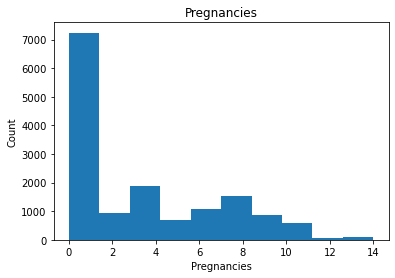

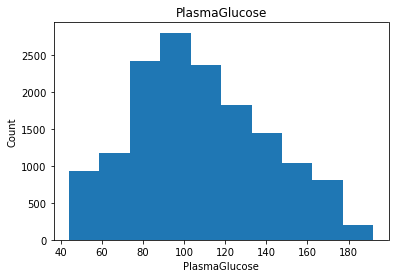

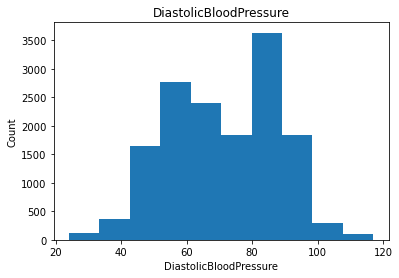

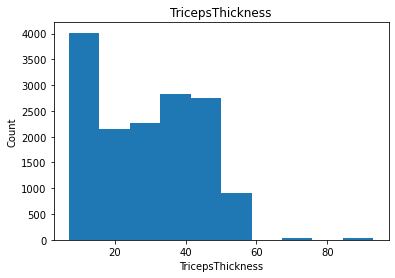

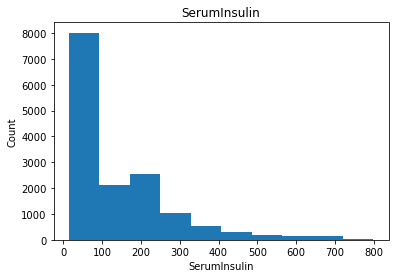

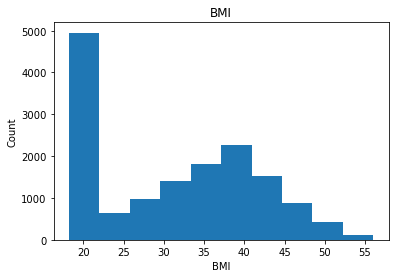

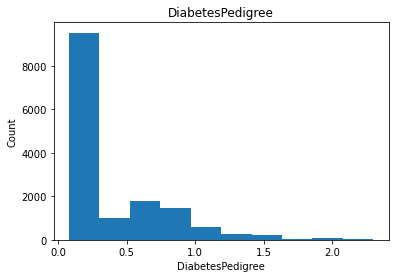

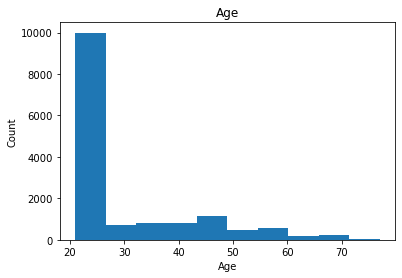

In [19]:
for feat in X.columns :    
    
    #plt.figure(figsize=(6,6))
    data[feat].hist()
    #sns.distplot(data[feat])
    
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.title(feat)
    
    plt.grid(False)
    plt.show()

**Compare the feature distributions for each label value**

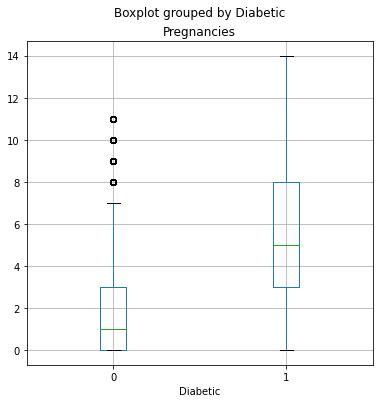

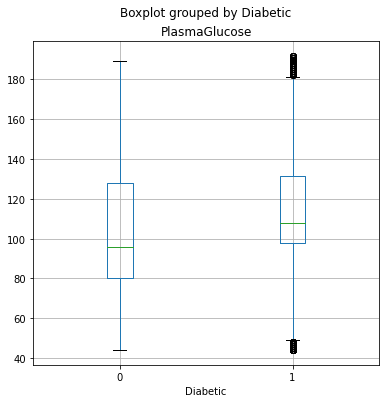

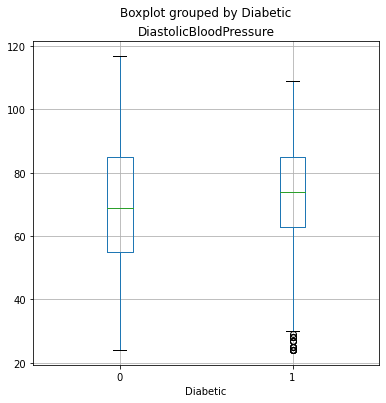

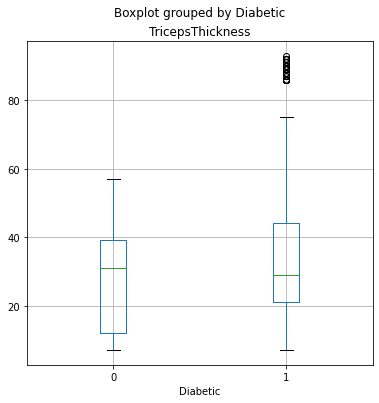

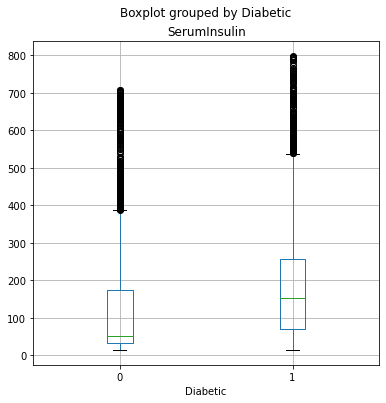

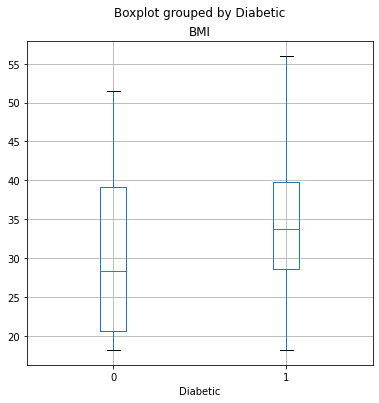

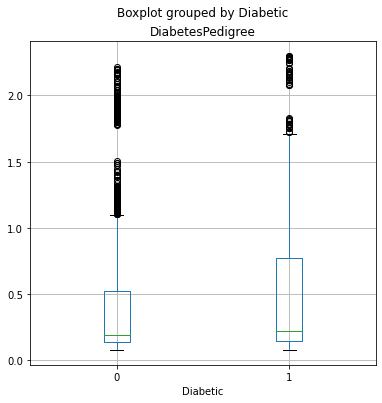

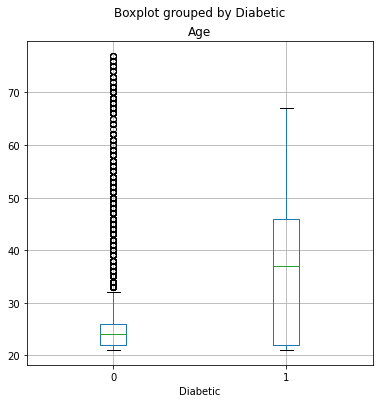

In [20]:
for feat in X.columns:
    data.boxplot(column=feat, by='Diabetic', figsize=(6,6))
    plt.show()

- For some of the features, there's a noticeable difference in the distribution for each label value. 

- In particular, `Pregnancies` and `Age` show markedly different distributions for diabetic patients than for non-diabetic patients. 

- These features may help predict whether or not a patient is diabetic.

<AxesSubplot:>

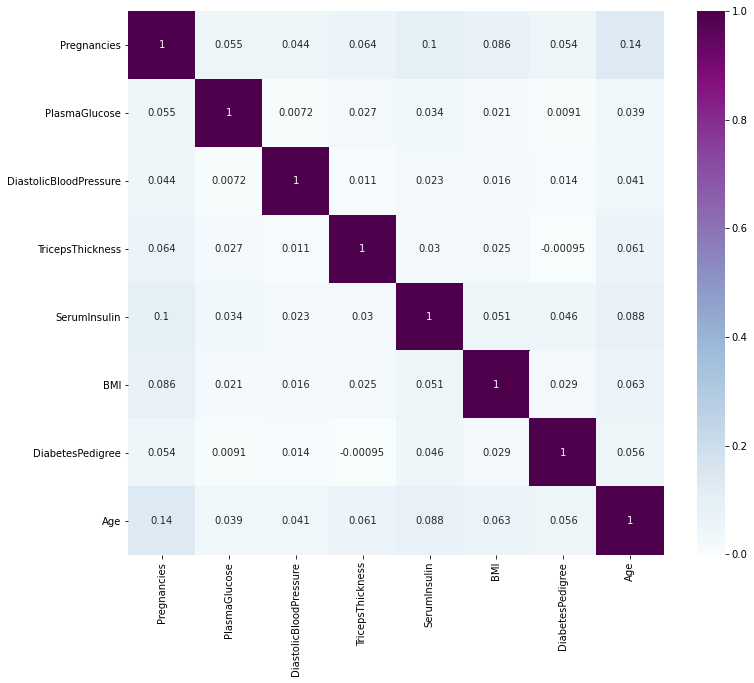

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr() ,cmap='BuPu' ,annot=True)

<h2 style='color:black'  align='center'>  Data Split </h2>

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
X.columns

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')

In [24]:
numeric_features = [0,1,2,3,4,5,6]

numeric_transformer = Pipeline([
                                 ('scaler', StandardScaler())
                               ])

In [25]:
categorical_features = [7]

categorical_transformer = Pipeline([
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                   ])

In [26]:
preprocessor = ColumnTransformer([
                                    ('num', numeric_transformer, numeric_features),
                                    ('cat', categorical_transformer, categorical_features)
                                 ])

<h2 style='color:black'  align='center'> Modeling </h2>

<h3 style='color:blue'  align='left'>1.Logistic Regression</h3>

In [27]:
# Set regularization rate
reg = 0.01

In [28]:
lr = LogisticRegression(C=1/reg ,solver='liblinear')

`C` : 
 - float, default=1.0
 - Inverse of regularization strength; must be a positive float.
 - Like in support vector machines, smaller values specify stronger
 - regularization.

In [29]:
lr.fit(X_train,y_train)

LogisticRegression(C=100.0, solver='liblinear')

In [30]:
lr_pred = lr.predict(X_test)

In [31]:
accuracy_score(y_test,lr_pred)

0.7891111111111111

In [32]:
lr_score = accuracy_score(y_test,lr_pred)

In [33]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



- The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

In [34]:
confusion_matrix(y_test,lr_pred)

array([[2637,  349],
       [ 600,  914]], dtype=int64)

In [35]:
lr_prob = lr.predict_proba(X_test)

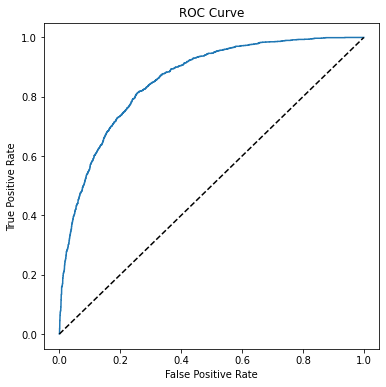

In [36]:
plt.figure(figsize=(6, 6))

#plot_roc_curve(model ,X_test ,y_test)
fpr, tpr, thresholds = roc_curve(y_test, lr_prob[:,1])
plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

- A perfect classifier would have a curve that goes straight up the left side and straight across the top. 

- The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. 


In [37]:
lr_auc = roc_auc_score(y_test,lr_prob[:,1])
print('AUC: ' + str(lr_auc))

AUC: 0.856873025240643


In [38]:
lr_precision = precision_score(y_test, lr_pred)
lr_recall    = recall_score(y_test, lr_pred)

<h3 style='color:blue'  align='left'>2.Logistic Regression with PreProcessing</h3>

In [39]:
pipeline = Pipeline([
                      ('preprocessor' ,preprocessor) ,
                      ('LogisticRegression' ,LogisticRegression(C=1/reg ,solver='liblinear'))
                   ])

In [40]:
lr2 = pipeline.fit(X_train,y_train)

In [41]:
lr2_pred = lr2.predict(X_test)

In [42]:
lr2_prob = lr2.predict_proba(X_test)

In [43]:
confusion_matrix(y_test, lr2_pred)

array([[2667,  319],
       [ 406, 1108]], dtype=int64)

In [44]:
accuracy_score(y_test, lr2_pred)

0.8388888888888889

In [45]:
lr2_pred_score = accuracy_score(y_test, lr2_pred)

In [46]:
print(classification_report(y_test, lr2_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2986
           1       0.78      0.73      0.75      1514

    accuracy                           0.84      4500
   macro avg       0.82      0.81      0.82      4500
weighted avg       0.84      0.84      0.84      4500



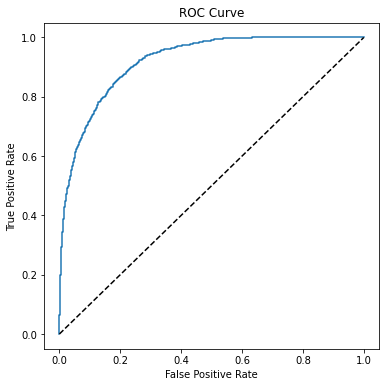

In [47]:
plt.figure(figsize=(6, 6))

# plot_roc_curve(model ,X_test ,y_test)
fpr, tpr, thresholds = roc_curve(y_test, lr2_prob[:,1])
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

In [48]:
lr2_auc = roc_auc_score(y_test,lr2_prob[:,1])
print('AUC: ' + str(lr2_auc))

AUC: 0.9202442751333613


In [49]:
lr2_precision = precision_score(y_test, lr2_pred)
lr2_recall    = recall_score(y_test, lr2_pred)

<h3 style='color:blue'  align='left'>3.Support Vector</h3>

In [50]:
pipeline = Pipeline([
                      ('preprocessor' ,preprocessor) ,
                      ('SVC' ,SVC(probability=True))
                   ])

In [51]:
sv = pipeline.fit(X_train ,y_train)

In [52]:
sv_pred = sv.predict(X_test)

In [53]:
sv_prob = sv.predict_proba(X_test)

In [54]:
confusion_matrix(y_test, sv_pred)

array([[2776,  210],
       [ 219, 1295]], dtype=int64)

In [55]:
accuracy_score(y_test, sv_pred)

0.9046666666666666

In [56]:
sv_score = accuracy_score(y_test, sv_pred)

In [57]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2986
           1       0.86      0.86      0.86      1514

    accuracy                           0.90      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.90      0.90      0.90      4500



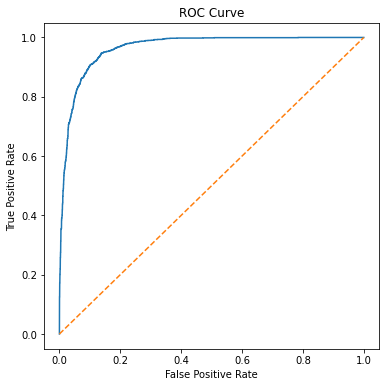

In [58]:
plt.figure(figsize=(6,6))

fpr,tpr,_ = roc_curve(y_test ,sv_prob[: ,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

In [59]:
sv_auc = roc_auc_score(y_test ,sv_prob[: ,1])
print('AUC score : ',str(sv_auc))

AUC score :  0.9643272524090847


In [60]:
sv_precision = precision_score(y_test, sv_pred)
sv_recall    = recall_score(y_test, sv_pred)

<h3 style='color:blue'  align='left'>4.Random Forest</h3>

In [61]:
pipeline = Pipeline([
                      ('preprocessor' ,preprocessor) ,
                      ('Random Forest' ,RandomForestClassifier(n_estimators=100))
                   ])

In [62]:
rf = pipeline.fit(X_train,y_train)

In [63]:
rf_pred = rf.predict(X_test)

In [64]:
rf_prob = rf.predict_proba(X_test)

In [65]:
confusion_matrix(y_test, rf_pred)

array([[2864,  122],
       [ 176, 1338]], dtype=int64)

In [66]:
accuracy_score(y_test, rf_pred)

0.9337777777777778

In [67]:
rf_score = accuracy_score(y_test, rf_pred)

In [68]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2986
           1       0.92      0.88      0.90      1514

    accuracy                           0.93      4500
   macro avg       0.93      0.92      0.93      4500
weighted avg       0.93      0.93      0.93      4500



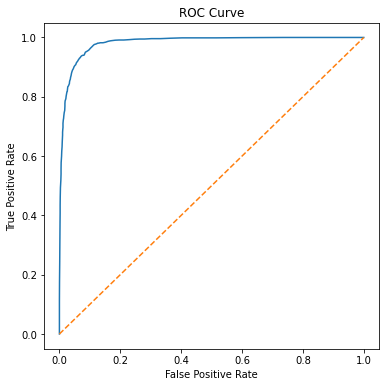

In [69]:
plt.figure(figsize=(6,6))

fpr,tpr,_ = roc_curve(y_test ,rf_prob[: ,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

In [70]:
rf_auc = roc_auc_score(y_test ,rf_prob[: ,1])
print('AUC score : ',str(rf_auc))

AUC score :  0.9819766572494627


In [71]:
rf_precision = precision_score(y_test, rf_pred)
rf_recall    = recall_score(y_test, rf_pred)

<h3 style='color:blue'  align='left'>5.KNN</h3>

In [72]:
k_range = list(range(1,20))
error = []


for k in k_range :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train ,y_train)
    
    y_pred = knn.predict(X_test)
    error.append(1-accuracy_score(y_test, y_pred))

Text(0.5, 1.0, 'Elbow Curve')

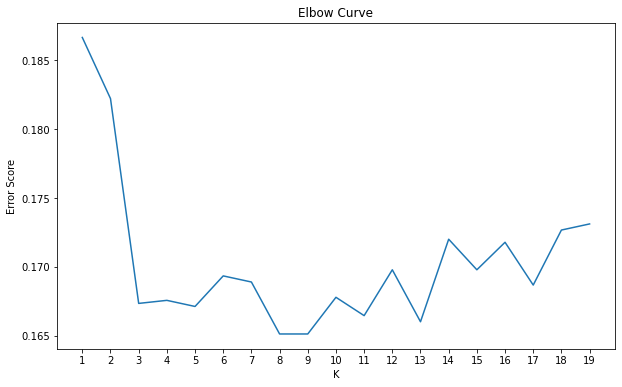

In [73]:
plt.figure(figsize=(10,6))

plt.plot(k_range ,error)
plt.xticks(range(1,20))
           
plt.xlabel('K')
plt.ylabel('Error Score')
plt.title('Elbow Curve')

In [74]:
knn = KNeighborsClassifier(n_neighbors=8)

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [76]:
knn.score(X_test,y_test)

0.8348888888888889

In [77]:
knn_pred = knn.predict(X_test)

In [79]:
confusion_matrix(y_test, knn_pred)

array([[2760,  226],
       [ 517,  997]], dtype=int64)

In [80]:
knn_score = accuracy_score(y_test, knn_pred)
knn_score

0.8348888888888889

In [81]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2986
           1       0.82      0.66      0.73      1514

    accuracy                           0.83      4500
   macro avg       0.83      0.79      0.80      4500
weighted avg       0.83      0.83      0.83      4500



In [78]:
knn_prob = knn.predict_proba(X_test)

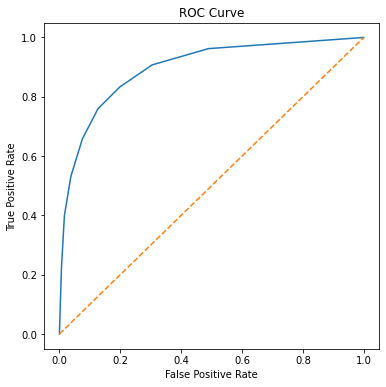

In [82]:
plt.figure(figsize=(6,6))

fpr,tpr,_ = roc_curve(y_test ,knn_prob[: ,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

In [83]:
knn_auc = roc_auc_score(y_test ,knn_prob[: ,1])
print('AUC score : ',str(knn_auc))

AUC score :  0.8957306045561806


In [84]:
knn_precision = precision_score(y_test, knn_pred)
knn_recall    = recall_score(y_test, knn_pred)

In [85]:
model_performance = pd.DataFrame({
                                    'Model'    : ['Logistic Regression without Preprocessing','Logistic Regression','Support Vector','RandomForest','KNN'] ,
                                    'Accuracy' : [lr_score ,lr2_pred_score ,sv_score,rf_score,knn_score] ,
                                    'Precision': [lr_precision,lr2_precision,sv_precision,rf_precision,knn_precision],
                                    'Recall'   : [lr_recall,lr2_recall,sv_recall,rf_recall,knn_recall],
                                    'AUC Score': [lr_auc ,lr2_auc ,sv_auc ,rf_auc ,knn_auc] 
                                })

model_performance

,Model,Accuracy,Precision,Recall,AUC Score
0,Logistic Regression without Preprocessing,0.789111,0.723674,0.603699,0.856873
1,Logistic Regression,0.838889,0.776454,0.731836,0.920244
2,Support Vector,0.904667,0.860465,0.855350,0.964327
3,RandomForest,0.933778,0.916438,0.883752,0.981977
4,KNN,0.834889,0.815209,0.658520,0.895731
